## Importing Libraries

In [50]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest,chi2,f_classif
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

import pickle
import string

import nltk
from nltk.stem import PorterStemmer

## Importing Dataset

In [51]:
data = pd.read_csv('Suicide_Detection.csv')
data.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


## Exploring Dataset

In [52]:
data.shape

(232074, 3)

In [53]:
df = data.sample(n=10000, random_state=42)
df

,Unnamed: 0,text,class
74414,111734,I Don't know?7? Months self harm free and the ...,suicide
149516,224358,I HAVE TO START BECOMING RICH I HAVE TO START ...,non-suicide
12484,18790,"A poem (haiku) for u/Me-Game-Dev hi, hello hel...",non-suicide
14043,21196,I've honestly got no idea what to do anymore.I...,suicide
30673,46089,Do you ever just cry? Like you just think abou...,non-suicide
...,...,...,...
72380,108660,"Why is it that I, a teenage female, do not lik...",non-suicide
62872,94280,Watching my English teacher crash and burn is ...,non-suicide
115556,173628,I have no controlI feel like everyone is telli...,suicide
128606,193157,I keep having nightmares (Trigger Warning) Nig...,non-suicide


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 74414 to 224640
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   text        10000 non-null  object
 2   class       10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 312.5+ KB


In [55]:
df['Unnamed: 0'].is_unique

True

In [56]:
df.drop(columns = 'Unnamed: 0',inplace=True)

In [57]:
df.head()

,text,class
74414,I Don't know?7? Months self harm free and the ...,suicide
149516,I HAVE TO START BECOMING RICH I HAVE TO START ...,non-suicide
12484,"A poem (haiku) for u/Me-Game-Dev hi, hello hel...",non-suicide
14043,I've honestly got no idea what to do anymore.I...,suicide
30673,Do you ever just cry? Like you just think abou...,non-suicide


In [58]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [59]:
df.duplicated().sum()

0

## Visualizing Data

non-suicide    5048
suicide        4952
Name: class, dtype: int64


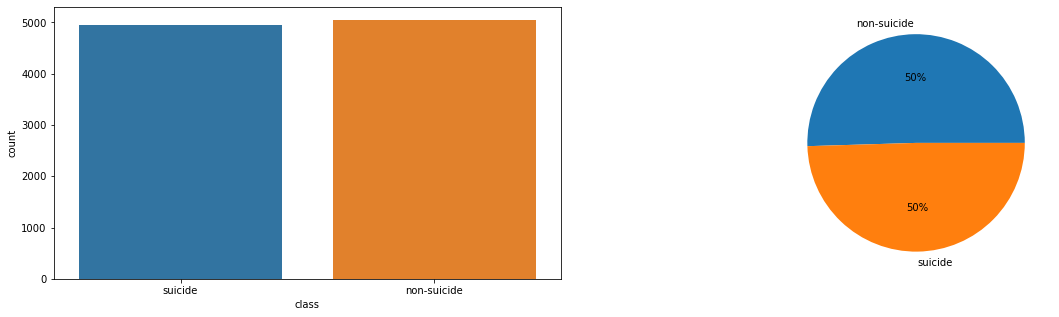

In [60]:
classCnt = df['class'].value_counts()
print(classCnt)

plt.figure(figsize=((20,5)))

plt.subplot(1,2,1)
sns.countplot(x=df['class'])

plt.subplot(1,2,2)
plt.pie(classCnt,labels = classCnt.index,autopct='%.0f%%')

plt.show()

In [61]:
df['text']= df['text'].str.lower()

In [62]:
df['text'] = df['text'].str.replace(r'[^\w\s]+', '',regex = True)

In [63]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [64]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [65]:
df['text'] = df['text'].apply(lambda x:nltk.word_tokenize(x))

In [66]:
ps = PorterStemmer()
df['text'] = df['text'].apply(lambda x : [ps.stem(i) for i in x])

In [67]:
df['text']=df['text'].apply(lambda x : ' '.join(x))

In [68]:
df.head()

,text,class
74414,dont know7 month self harm free urg get strong...,suicide
149516,start becom rich start compani becom 16 afford...,non-suicide
12484,poem haiku umegamedev hi hello hello stop fuck...,non-suicide
14043,ive honestli got idea anymoreit feel everyon f...,suicide
30673,ever cri like think unfair life cri cant cri e...,non-suicide


In [69]:
# Saved the cleaned dataset.
df.to_csv('file1.csv')

In [70]:
dfnew = pd.read_csv('file1.csv')
dfnew.head()

,Unnamed: 0,text,class
0,74414,dont know7 month self harm free urg get strong...,suicide
1,149516,start becom rich start compani becom 16 afford...,non-suicide
2,12484,poem haiku umegamedev hi hello hello stop fuck...,non-suicide
3,14043,ive honestli got idea anymoreit feel everyon f...,suicide
4,30673,ever cri like think unfair life cri cant cri e...,non-suicide


In [71]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   text        9999 non-null   object
 2   class       10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [72]:
ind = dfnew[dfnew['text'].isnull()].index

In [73]:
df.iloc[ind]

,text,class
102482,,suicide


In [74]:
dfnew.dropna(inplace=True)

In [75]:
x,y = dfnew['text'],dfnew['class']

In [76]:
vectorizer = TfidfVectorizer(min_df=50,max_features=5000)
x =  vectorizer.fit_transform(x).toarray()

In [77]:
# Save the model
with open('tfidf.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)    

In [78]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=5)

In [79]:
X_train.shape,X_test.shape

((6999, 1320), (3000, 1320))

In [80]:
nb = GaussianNB()
nb2 = BernoulliNB()
nb3 = MultinomialNB()
VotingClassifiers = VotingClassifier(estimators=[('GaussianNB', nb),('BernoulliNB',nb2), ('MultinomialNB', nb3)], voting = 'soft')
VotingClassifiers.fit(X_train, y_train)
print('Training score:',VotingClassifiers.score(X_train, y_train))
print('Testing score:',VotingClassifiers.score(X_test,y_test))

Training score: 0.899271324474925
Testing score: 0.8753333333333333


              precision    recall  f1-score   support

 non-suicide       0.88      0.88      0.88      1542
     suicide       0.87      0.87      0.87      1458

    accuracy                           0.88      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.88      0.88      0.88      3000



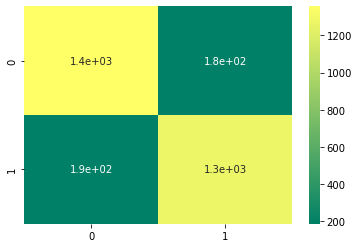

In [81]:
y_act=y_test
y_pred=VotingClassifiers.predict(X_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='summer')
print(classification_report(y_act,y_pred))

In [82]:
with open('best_model.pkl', 'wb') as f:
    pickle.dump(VotingClassifiers, f)  